In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, auc, roc_curve

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.bias = None
        self.weights = None
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradiente descendente
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            # Calcula os gradientes
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)

            # Atualiza os parâmetros
            self.weights = self.weights - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate * db

    def predict(self, X, return_proba=False):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        
        return y_pred if return_proba else [1 if i > 0.5 else 0 for i in y_pred]

In [2]:
df_cars = pd.read_csv('../dados/car-evaluation-uci/cars.csv', sep=',', header=None)
df_cars.columns = ["buying", "maintenance", "doors", "persons", "lug_boot", "safety", "class"]

for col in df_cars.columns[:-1]:
    df_cars[col] = df_cars[col].astype('category')
    df_cars[col] = df_cars[col].cat.codes
    
# unacc = 0
# others = 1
df_cars[df_cars["class"] != 'unacc'] = 0
df_cars["class"] = df_cars["class"].replace('unacc', 1)

df_cars

,buying,maintenance,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,1
1,3,3,0,0,2,2,1
2,3,3,0,0,2,0,1
3,3,3,0,0,1,1,1
4,3,3,0,0,1,2,1
...,...,...,...,...,...,...,...
1723,0,0,0,0,0,0,0
1724,0,0,0,0,0,0,0
1725,1,1,3,2,0,1,1
1726,0,0,0,0,0,0,0


In [3]:
X_train, X_test, y_train, y_test = train_test_split(df_cars[df_cars.columns[:-1]], df_cars[df_cars.columns[-1]], test_size=0.2)

clf = LogisticRegression()
clf.fit(X_train, y_train)
print(confusion_matrix(y_test, clf.predict(X_test)))
print(accuracy_score(y_test, clf.predict(X_test)))

[[114   0]
 [  0 232]]
1.0


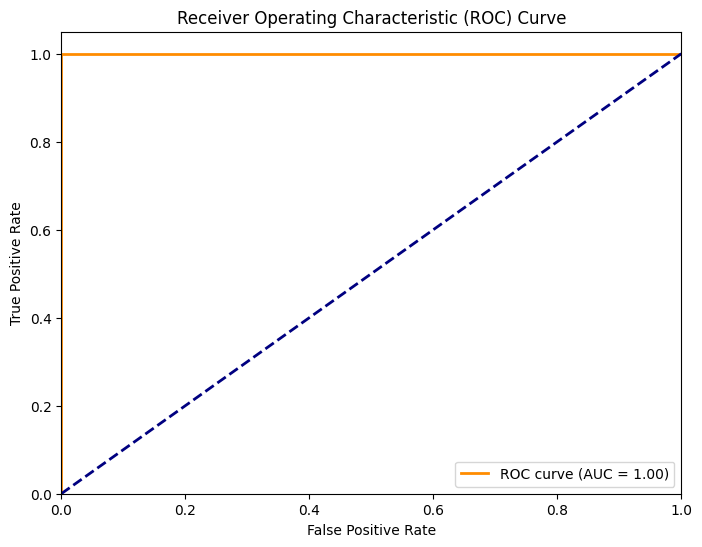

In [4]:
y_prob = clf.predict(X_test, return_proba=True)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()